In [1]:
n = (13 + 4) % 5 + 1
print("Варіант № ", n)

Варіант №  3


In [8]:
# task 1
import pandas as pd
names = pd.read_csv("NationalNames.csv")
print(names.head(8))

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746


In [10]:
# task 2
print(names.tail(8))

              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5


In [12]:
# task 3
names.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

In [16]:
# task 5
unique_names_count = names['Name'].nunique()

print(unique_names_count)

93889


In [56]:
# task 10
unique_per_year = names.groupby('Year')['Name'].nunique()

print(unique_per_year.head(5))

Year
1880    1889
1881    1830
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64


In [30]:
# task 11
most_unique = unique_per_year.idxmax()

print(most_unique, unique_per_year[most_unique])

2008 32488


In [40]:
# task 12
data_2008 = names[names['Year'] == 2008]
most_popular_name_2008 = data_2008.loc[data_2008['Count'].idxmax(), 'Name']

print(most_popular_name_2008)

Jacob


In [44]:
# task 13
jacob_fem = names[(names['Name'] == 'Jacob') & (names['Gender'] == 'F')]
most_popular_jacob_fem = jacob_fem.loc[jacob_fem['Count'].idxmax()]

print(most_popular_jacob_fem)

2004


In [52]:
# task 14
gn_names = names[names.duplicated(subset='Name', keep=False)]
gn_count = gn_names.groupby('Year')['Name'].count()
year_max_gn = gn_count.idxmax()
max_gn_count = gn_count.max()

print(f"Year: {year_max_gn}, Gender-Neutral Names: {max_gn_count}")

Year: 2008, Count of Gender-Neutral Names: 34291


In [58]:
# task 15
total_births_per_year = names.groupby('Year')['Count'].sum()

print(total_births_per_year.head(5))

Year
1880    201484
1881    192699
1882    221538
1883    216950
1884    243467
Name: Count, dtype: int64


In [62]:
# task 17
births_by_gender = names.groupby(['Year', 'Gender'])['Count'].sum().unstack()

print(births_by_gender.head(5))

Gender       F       M
Year                  
1880     90993  110491
1881     91954  100745
1882    107850  113688
1883    112321  104629
1884    129022  114445


In [64]:
# task 18
births_by_gender = names.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_girls = (births_by_gender['F'] > births_by_gender['M']).sum()

print(years_more_girls)

54


In [70]:
# task 21
barbara_m = names[(names['Name'] == 'Barbara') & (names['Gender'] == 'M')]
barbara_m_count = barbara_m['Count'].sum()

print(barbara_m_count)

4139


In [72]:
# task 22
number_of_years = names['Year'].nunique()

print(f"Дослідження проводилося {number_of_years} років")

Дослідження проводилося 135 років


In [116]:
# task 23
# all gn
gender_counts = names.groupby('Name')['Gender'].nunique()
neutral_names = gender_counts[gender_counts == 2].index

# Групуємо по імені та року, рахуємо кількість статей у кожному році
yearly_gender_counts = names[names['Name'].isin(neutral_names)].groupby(['Name', 'Year'])['Gender'].nunique()

# all years where the name was gn
years_neutral = yearly_gender_counts[yearly_gender_counts == 2].reset_index().groupby('Name')['Year'].nunique()

# gn in all years
total_years = names['Year'].nunique()
consistent_neutral = years_neutral[years_neutral == total_years].index.tolist()

print(consistent_neutral)

['Francis', 'James', 'Jean', 'Jesse', 'Jessie', 'John', 'Johnnie', 'Joseph', 'Lee', 'Leslie', 'Marion', 'Ollie', 'Robert', 'Sidney', 'Tommie', 'William']


In [106]:
# task 24
unpopular = names[names['Count'] == names['Count'].min()]
name_counts = unpopular.groupby('Name')['Count'].sum()
max_name = name_counts.sort_values(ascending=False).index[0]
max_count = name_counts.max()

print(f"Найбільш популярне з непопулярних імен - це {max_name}. Їм називали {max_count} разів")

Найбільш популярне з непопулярних імен - це Celester. Їм називали 160 раз


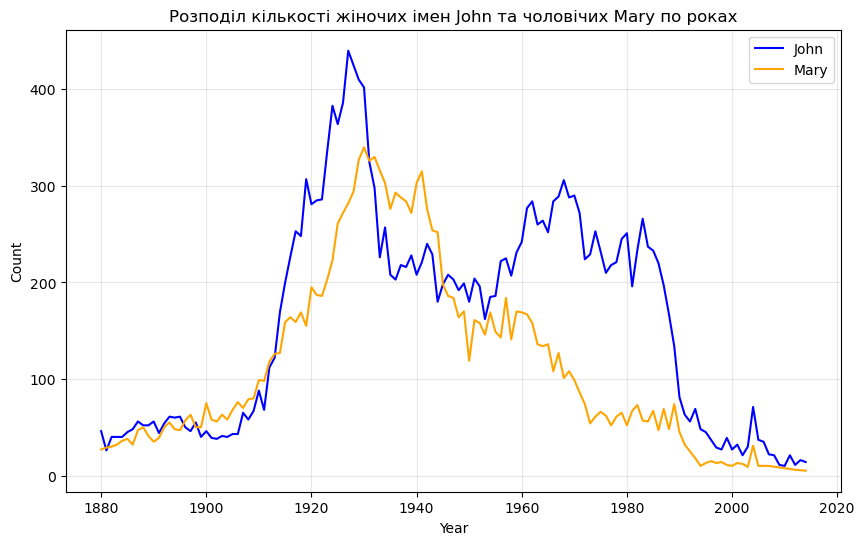

In [108]:
# task 26
import matplotlib.pyplot as plt

john_female = names[(names['Name'] == 'John') & (names['Gender'] == 'F')]
mary_male = names[(names['Name'] == 'Mary') & (names['Gender'] == 'M')]

plt.figure(figsize=(10, 6))
plt.plot(john_female['Year'], john_female['Count'], label='John', color='blue')
plt.plot(mary_male['Year'], mary_male['Count'], label='Mary', color='orange')

plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Розподіл кількості жіночих імен John та чоловічих Mary по роках')

plt.show()